### 시도별 화재발생 현황 총괄

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [font]+current_font_list

df_fire = pd.read_csv('시도별_화재발생_현황_총괄__20230307153319.csv',encoding='cp949')

filter1 = df_fire['행정구역별'] != '전국'
data = df_fire[filter1]
df_fire.head()

,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,전국,2010,41863,304,1588,266776332,117808118,148968214,1183,2623
1,전국,2011,43875,263,1599,256547614,113257928,143289686,1158,2417
2,전국,2012,43249,267,1955,289493719,127500018,161993701,1062,2254
3,전국,2013,40932,307,1877,434462330,178812680,255649650,1354,2330
4,전국,2014,42135,325,1856,405356513,168824616,236531897,1178,2374


C:\Users\ITPS\AppData\Local\Temp\ipykernel_2544\4232427757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['부상 (명)'] = pd.to_numeric(data['부상 (명)'])


<AxesSubplot: xlabel='행정구역별', ylabel='부상 (명)'>

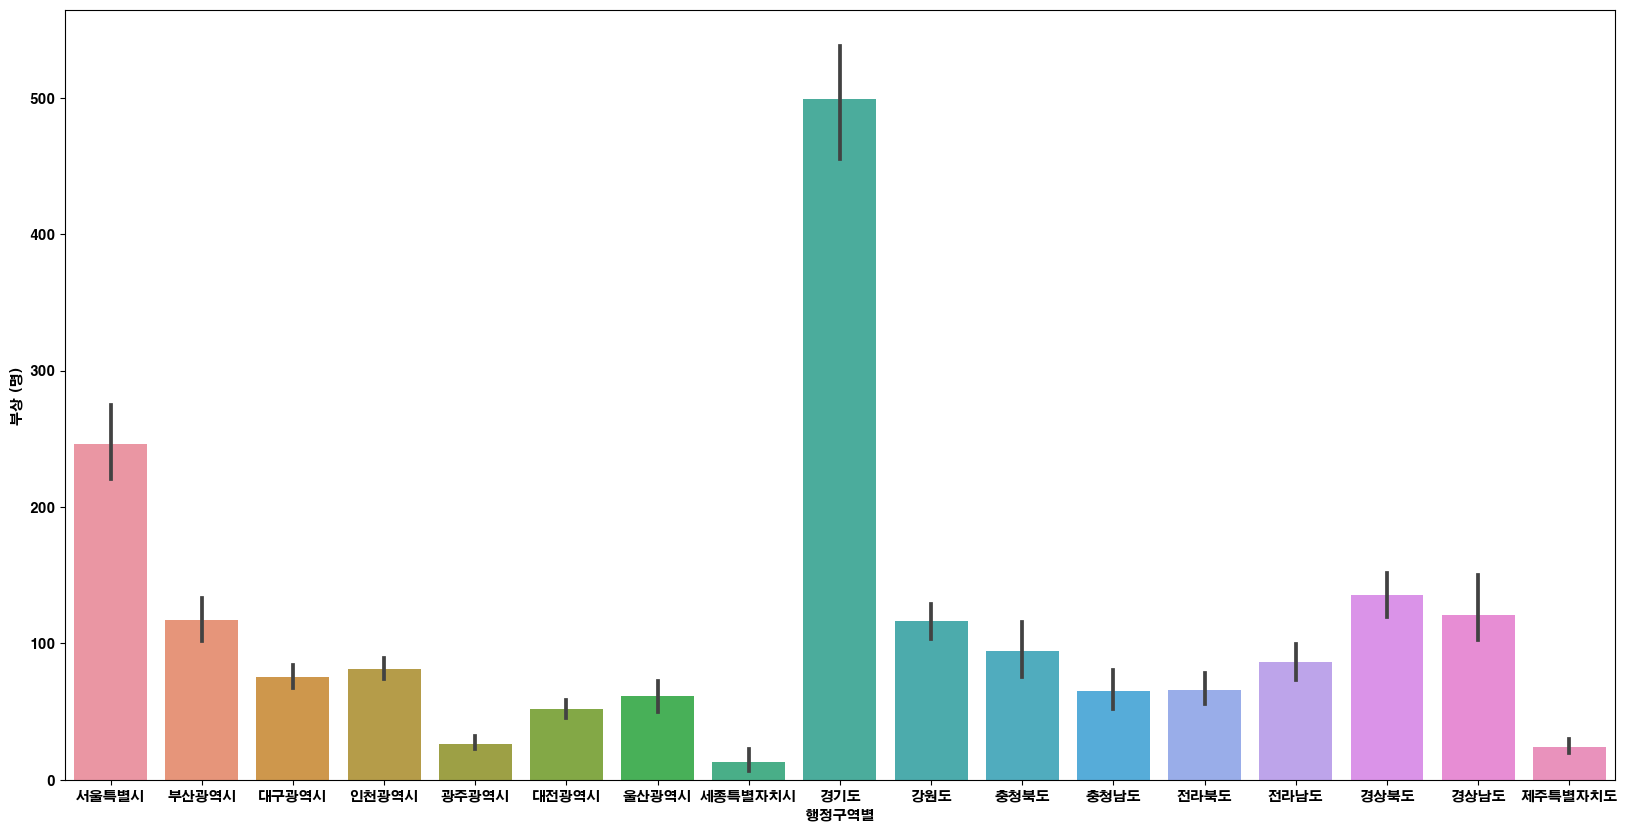

In [6]:
fig1 = plt.figure(figsize=(20,10))
a = fig1.add_subplot()
data['부상 (명)'] = pd.to_numeric(data['부상 (명)'])
sns.barplot(data=data, x="행정구역별", y="부상 (명)",ax=a)

<AxesSubplot: xlabel='시점', ylabel='이재민수 (명)'>

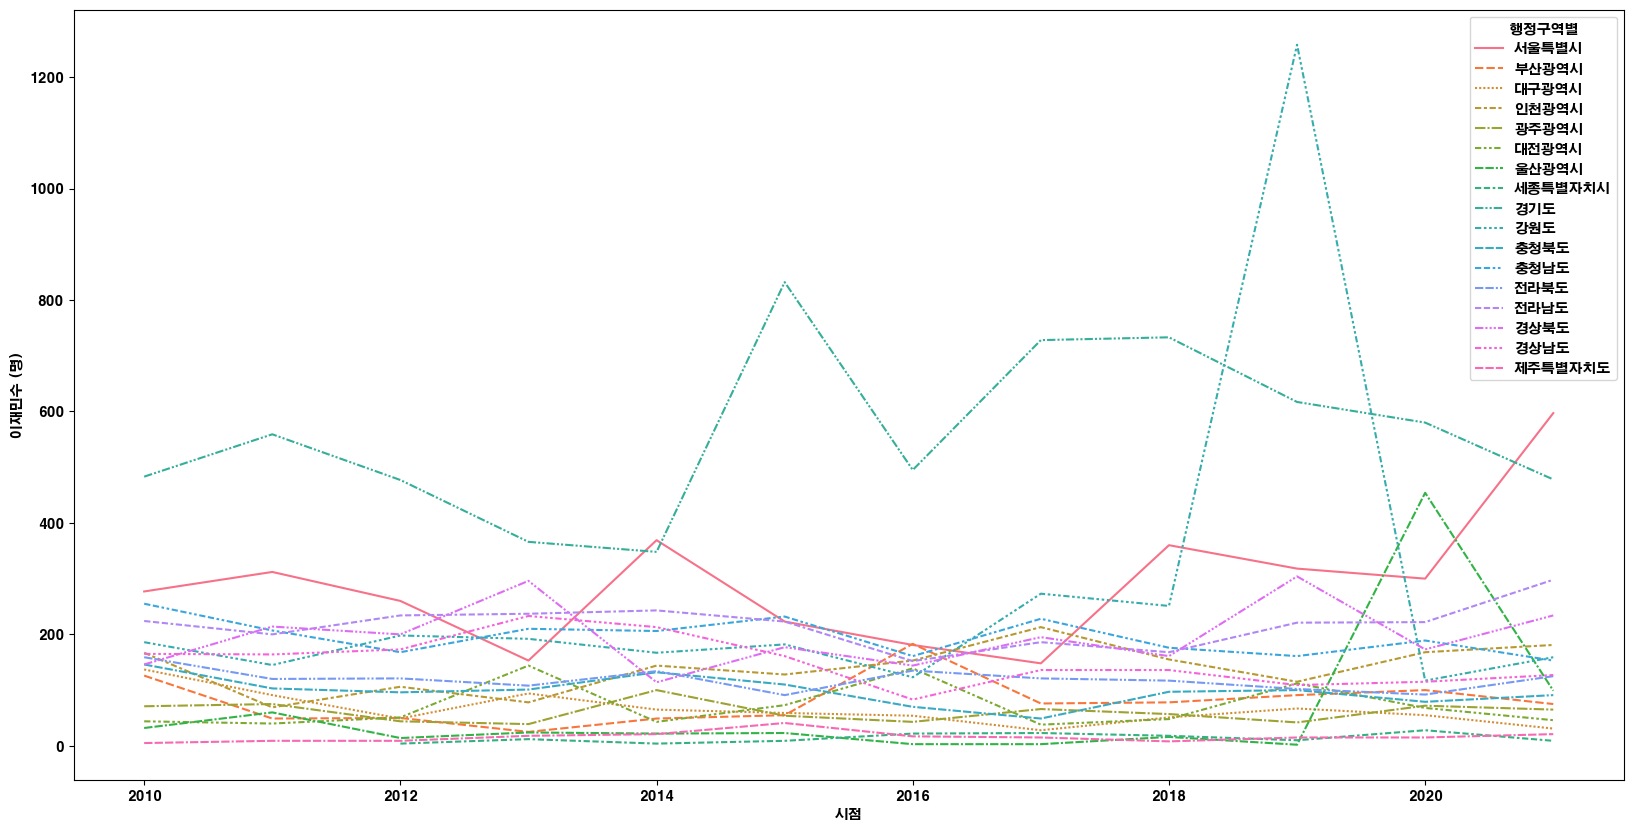

In [21]:
fig1 = plt.figure(figsize=(20,10))
a = fig1.add_subplot()
sns.lineplot(data=data, x = '시점',y='이재민수 (명)',hue='행정구역별',style='행정구역별',ax=a)

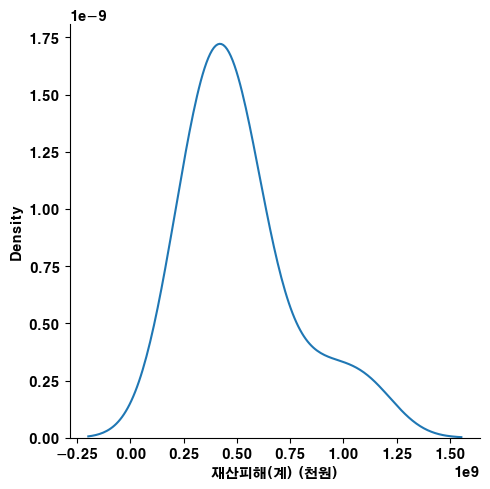

In [43]:
filter1 = df_fire['행정구역별'] == '전국'
data2 = df_fire[filter1]
# catplot을 사용하여 시각화
sns.displot(data=data2, x="재산피해(계) (천원)", kind = 'kde')
plt.show()

C:\Users\ITPS\AppData\Local\Temp\ipykernel_2544\3646160466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['부동산피해 비율'] = data['부동산 (천원)'] / data['재산피해(계) (천원)']
C:\Users\ITPS\AppData\Local\Temp\ipykernel_2544\3646160466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['동산피해 비율'] = data['동산 (천원)'] / data['재산피해(계) (천원)']


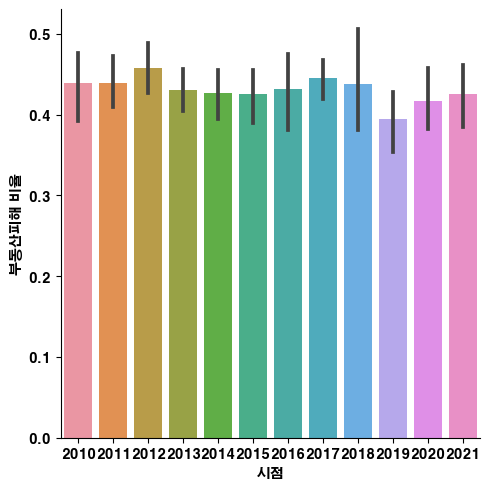

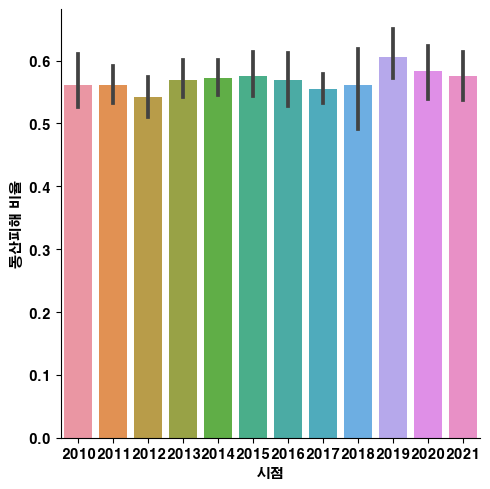

In [50]:
# 데이터 형식을 수치형으로 변환
# data[['재산피해(계) (천원)', '부동산 (천원)', '동산 (천원)']] = data[['재산피해(계) (천원)', '부동산 (천원)', '동산 (천원)']].apply(pd.to_numeric)

# 시점별로 부동산피해와 동산피해의 비율을 계산하고, 새로운 열로 추가
data['부동산피해 비율'] = data['부동산 (천원)'] / data['재산피해(계) (천원)']
data['동산피해 비율'] = data['동산 (천원)'] / data['재산피해(계) (천원)']

# catplot을 사용하여 시각화
sns.catplot(data=data, x="시점", y="부동산피해 비율", kind="bar")
sns.catplot(data=data, x="시점", y="동산피해 비율", kind="bar")
plt.show()